In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [ ]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0, 1, 25)
colores = cmap(saltos)

In [ ]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Entrenamieto_ECI_2020.csv')
entrenamiento.replace('None', 'Sin Especificar', inplace = True)
entrenamiento = entrenamiento.dropna()
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,Sin Especificar,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,Sin Especificar,Netherlands,Account_Name_619,Opportunity_Name_12598,0,Sin Especificar,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,Sin Especificar,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,Sin Especificar,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,Sin Especificar,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,Sin Especificar,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [ ]:
entrenamiento['Brand'].value_counts()

Sin Especificar    12704
Other                571
Brand_9              136
Brand_5               43
Brand_24              38
Brand_11              32
Brand_10              22
Brand_22              20
Brand_25              19
Brand_13              17
Brand_7               17
Brand_21              15
Brand_20              10
Brand_23               9
Brand_17               5
Brand_27               5
Brand_4                4
Brand_2                4
Brand_0                4
Brand_12               2
Brand_16               2
Brand_19               1
Brand_1                1
Brand_3                1
Brand_6                1
Brand_26               1
Name: Brand, dtype: int64

Marcas mas concurridas

In [ ]:
marcas = entrenamiento.groupby('Brand').agg({'ID':'count'})
marcas = marcas.rename(columns = {'ID': 'Oportunidades'})
marcas

,Oportunidades
Brand,
Brand_0,4
Brand_1,1
Brand_10,22
Brand_11,32
Brand_12,2
Brand_13,17
Brand_16,2
Brand_17,5
Brand_19,1


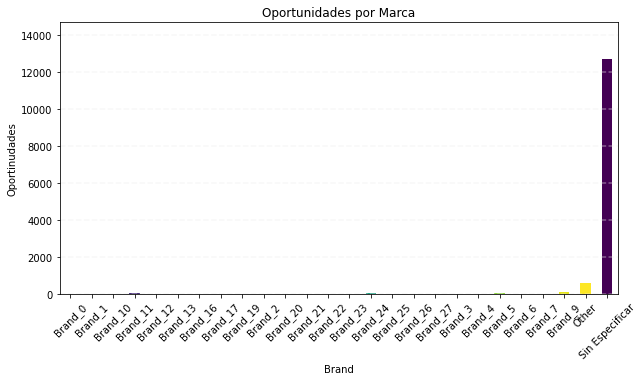

In [ ]:
graf0 = marcas['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=45, title='Oportunidades por Marca', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Brand')
lineas = graf0.get_yticks()
for i in lineas:
      graf0.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

Evidentemente los productos sin marca y marca generica son mayoria en las ventas. Sin embargo analizamos las que si tienen marca

In [ ]:
marcas = entrenamiento[(entrenamiento['Brand'] != 'Sin Especificar') & (entrenamiento['Brand'] != 'Other')]
marcas['Brand'].value_counts()

Brand_9     136
Brand_5      43
Brand_24     38
Brand_11     32
Brand_10     22
Brand_22     20
Brand_25     19
Brand_13     17
Brand_7      17
Brand_21     15
Brand_20     10
Brand_23      9
Brand_17      5
Brand_27      5
Brand_0       4
Brand_2       4
Brand_4       4
Brand_16      2
Brand_12      2
Brand_26      1
Brand_3       1
Brand_1       1
Brand_6       1
Brand_19      1
Name: Brand, dtype: int64

In [ ]:
marcas_reales = entrenamiento[(marcas['Brand'] != 'Sin Especificar') & (entrenamiento['Brand'] != 'Other')]
marcas_reales = marcas_reales.groupby('Brand').agg({'ID':'count'})
marcas_reales = marcas_reales.rename(columns = {'ID': 'Oportunidades'})
marcas_reales



,Oportunidades
Brand,
Brand_0,4
Brand_1,1
Brand_10,22
Brand_11,32
Brand_12,2
Brand_13,17
Brand_16,2
Brand_17,5
Brand_19,1


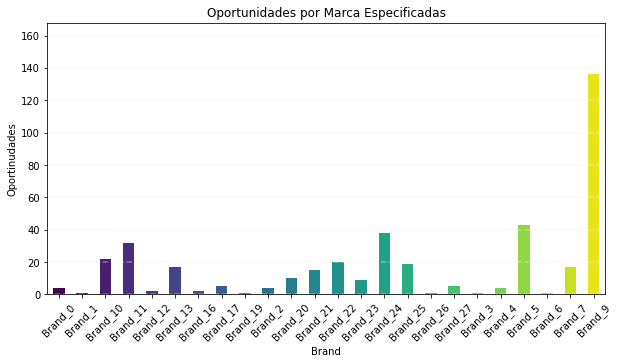

In [ ]:
graf_reales = marcas_reales['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=45, title='Oportunidades por Marca Especificadas', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Brand')
lineas = graf_reales.get_yticks()
for i in lineas:
      graf_reales.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

Oportunidades de cada marca

In [ ]:
marcas_ventas = marcas[marcas['Stage']== 'Closed Won']
marcas_ventas['Brand'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: Brand, dtype: object)>



Ninguno llegó al Close Won

In [ ]:
marcas.groupby('Stage').agg({'ID':'count'})

,ID
Stage,
Closed Lost,409


In [ ]:
marcas_fallos = marcas[marcas['Stage'] == 'Closed Lost']
marcas_fallos

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
956,9666,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,8/31/2016,Source_13,Germany,Account_Name_593,Opportunity_Name_4522,515,Sin Especificar,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_2,1/23/2017,Brand_9,Product_Type_4,Size_3,Product_Category_B_4,0.27,EUR,NaT,7/13/2018,8/29/2018,Person_Name_13,Product_Family_128,Product_Name_204,EUR,0.290,USD,0.32802,10/1/2018,10/12/2018,2018 - 10,Q4,2018,NaT,6,EUR,1884420.00,EUR,1884420.00,Closed Lost,Prod_Category_A_None
1500,12411,APAC,Australia,1,1,0,0,0,Bureaucratic_Code_4,4/18/2017,Source_7,Australia,Account_Name_370,Opportunity_Name_6686,863,Sin Especificar,Person_Name_43,Person_Name_43,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2/21/2017,Brand_11,Other,Other,Other,Other,USD,NaT,NaT,4/20/2018,Person_Name_43,Product_Family_209,Product_Name_433,USD,0.380,USD,0.38000,6/11/2018,6/29/2018,2018 - 6,Q2,2018,NaT,5,USD,1900163.40,USD,3800201.40,Closed Lost,Prod_Category_A_None
1501,12422,APAC,Australia,1,1,0,0,0,Bureaucratic_Code_4,4/18/2017,Source_7,Australia,Account_Name_370,Opportunity_Name_6686,863,Sin Especificar,Person_Name_43,Person_Name_43,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2/21/2017,Brand_11,Other,Other,Other,Other,USD,NaT,NaT,4/20/2018,Person_Name_43,Product_Family_213,Product_Name_446,USD,0.380,USD,0.38000,6/11/2018,6/29/2018,2018 - 6,Q2,2018,NaT,5,USD,1900038.00,USD,3800201.40,Closed Lost,Prod_Category_A_None
1760,19111,EMEA,France,1,0,0,0,0,Bureaucratic_Code_5,2/10/2014,Source_7,Germany,Account_Name_991,Opportunity_Name_3666,1053,Sin Especificar,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_2,3/8/2017,Brand_9,Product_Type_0,Size_4,Product_Category_B_14,Other,EUR,NaT,11/28/2017,3/27/2018,Person_Name_16,Product_Family_133,Product_Name_223,EUR,0.385,USD,0.43547,5/29/2018,6/15/2018,2018 - 5,Q2,2018,NaT,8,EUR,3081540.00,EUR,3081540.00,Closed Lost,Prod_Category_A_None
3202,12708,EMEA,France,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Sin Especificar,France,Account_Name_34,Opportunity_Name_6614,1752,Sin Especificar,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_8,5/19/2016,Brand_7,Product_Type_3,Size_3,Product_Category_B_1,0.29,EUR,NaT,2/12/2018,4/17/2018,Person_Name_16,Product_Family_100,Product_Name_128,EUR,0.300,USD,0.33933,11/5/2018,11/5/2018,2018 - 11,Q4,2018,NaT,1,EUR,319950.00,EUR,319950.00,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,8582,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/25/2016,Source_9,Germany,Account_Name_697,Opportunity_Name_103,10369,Sin Especificar,Person_Name_13,Person_Name_13,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_2,11/28/2018,Brand_24,Product_Type_3,Size_3,Product_Category_B_2,0.215,EUR,NaT,11/30/2018,12/7/2018,Person_Name_13,Product_Family_127,Product_Name_210,EUR,0.225,USD,0.25450,12/17/2018,12/21/2018,2018 - 12,Q4,2018,NaT

Oportunidades perdidas de las marcas

In [ ]:
marcas_fallos = marcas_fallos.groupby('Brand').agg({'ID':'count'})
marcas_fallos = marcas_fallos.sort_values('ID', ascending = False)
marcas_fallos = marcas_fallos.rename(columns = {'ID': 'Oportunidades Perdidas'})
marcas_fallos

,Oportunidades Perdidas
Brand,
Brand_9,136
Brand_5,43
Brand_24,38
Brand_11,32
Brand_10,22
Brand_22,20
Brand_25,19
Brand_7,17
Brand_13,17


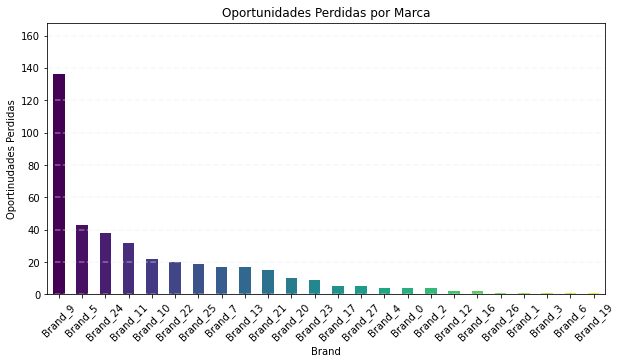

In [ ]:
graf3 = marcas_fallos['Oportunidades Perdidas'].plot(kind='bar', figsize=(10,5), rot=45, title='Oportunidades Perdidas por Marca', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades Perdidas')
ax.set_xlabel('Brand')
lineas = graf3.get_yticks()
for i in lineas:
      graf3.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

informe de las perdidas de las marcas

In [ ]:
sin_es = entrenamiento[(entrenamiento['Brand'] == 'Sin Especificar') | (entrenamiento['Brand'] == 'Other')]
sin_es = sin_es.groupby(['Brand','Stage']).agg({'ID':'count'})

sin_es

ID
Brand           Stage              
Other           Closed Lost     571
Sin Especificar Closed Lost    5115
                Closed Won     7530
                Negotiation      14
                Proposal         34
                Qualification    11

In [ ]:
entrenamiento_won = entrenamiento[entrenamiento['Stage'] == 'Closed Won']
entrenamiento_won

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
1,27760,EMEA,Sin Especificar,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,Sin Especificar,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.00,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.60,Closed Won,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,Sin Especificar,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/9/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.0,USD,50688.00,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,Sin Especificar,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/9/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.539,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.00,Closed Won,Prod_Category_A_None
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,20,Sin Especificar,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,12/9/2015,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,1/8/2016,12/9/2015,Person_Name_13,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,EUR,103350.0,EUR,103350.00,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_4060,12797,Sin Especificar,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,12/4/2015,Sin Especificar,Sin Especifi

Oportunidades triunfantes

In [ ]:
entrenamiento_won.groupby('Brand').agg({'ID':'count'})

,ID
Brand,
Sin Especificar,7530


Todas fueron Sin Esoecificar

In [ ]:
sin_es = entrenamiento[entrenamiento['Brand'] == 'Sin Especificar']
sin_es.groupby('Stage').agg({'ID':'count'})



,ID
Stage,
Closed Lost,5115
Closed Won,7530
Negotiation,14
Proposal,34
Qualification,11


In [ ]:
sin_esp = sin_es[(sin_es['Stage'] == 'Closed Won') | (sin_es['Stage'] == 'Closed Lost')]
sin_esp = sin_esp.groupby('Stage').agg({'ID':'count'})

sin_esp=sin_esp.rename(columns = {'ID': 'Oportunidades'})
sin_esp

,Oportunidades
Stage,
Closed Lost,5115
Closed Won,7530


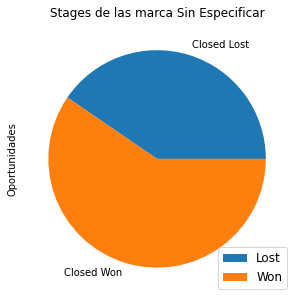

In [ ]:
sin_esp_marcas = sin_esp.plot.pie(y='Oportunidades', figsize=(5, 5))
sin_esp_marcas.set_title('Stages de las marca Sin Especificar')
h,l = sin_esp_marcas.get_legend_handles_labels()
sin_esp_marcas.legend(h[:5],["Lost", "Won"], loc=4, fontsize=12)

In [ ]:
marcas_en_proceso = entrenamiento[(entrenamiento['Stage']!= 'Closed Won') & (entrenamiento['Stage']!= 'Closed Lost')]
marcas_en_proceso

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
7521,12989,EMEA,Norway,1,1,1,1,0,Bureaucratic_Code_4,9/30/2016,Sin Especificar,Norway,Account_Name_1195,Opportunity_Name_5496,4634,Sin Especificar,Person_Name_58,Person_Name_58,Account_Type_2,Opportunity_Type_4,Non Binding,Delivery_Terms_2,9/13/2017,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,10/13/2017,2/8/2018,Person_Name_47,Product_Family_203,Product_Name_418,USD,1.000,USD,1.00000,9/29/2017,10/13/2017,2017 - 9,Q3,2017,NaT,0,USD,1.360000e+03,USD,0.000000e+00,Proposal,Prod_Category_A_None
13033,8624,Japan,Sin Especificar,1,0,1,0,0,Bureaucratic_Code_5,9/14/2017,Sin Especificar,Japan,Account_Name_1609,Opportunity_Name_10806,7914,Sin Especificar,Person_Name_55,Person_Name_55,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_5,3/8/2018,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,NaT,12/3/2018,Person_Name_55,Product_Family_183,Product_Name_353,JPY,40.000,USD,0.35962,11/20/2019,11/20/2019,2019 - 11,Q4,2019,NaT,2,JPY,6.795360e+07,JPY,6.795360e+07,Proposal,Prod_Category_A_None
14816,7978,APAC,Australia,1,0,1,0,0,Bureaucratic_Code_5,2/16/2017,Source_7,Thailand,Account_Name_262,Opportunity_Name_7485,9229,Sin Especificar,Person_Name_43,Person_Name_43,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,8/21/2018,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,NaT,8/21/2018,Person_Name_43,Product_Family_213,Product_Name_446,USD,0.300,USD,0.30000,10/1/2019,12/31/2019,2019 - 10,Q4,2019,NaT,5,USD,1.500450e+06,USD,3.000165e+06,Qualification,Prod_Category_A_None
14817,7983,APAC,Australia,1,0,1,0,0,Bureaucratic_Code_5,2/16/2017,Source_7,Thailand,Account_Name_262,Opportunity_Name_7485,9229,Sin Especificar,Person_Name_43,Person_Name_43,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,8/21/2018,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,NaT,8/21/2018,Person_Name_43,Product_Family_209,Product_Name_433,USD,0.300,USD,0.30000,10/1/2019,12/31/2019,2019 - 10,Q4,2019,NaT,5,USD,1.499715e+06,USD,3.000165e+06,Qualification,Prod_Category_A_None
14819,14927,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,11/17/2016,Source_9,Indonesia,Account_Name_65,Opportunity_Name_5798,9232,Sin Especificar,Person_Name_63,Person_Name_63,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_1,8/21/2018,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,3/24/2019,10/29/2018,Person_Name_63,Product_Family_212,Product_Name_448,USD,0.290,USD,0.29000,9/17/2020,10/14/2020,2020 - 9,Q3,2020,NaT,1,USD,2.842000e+05,USD,2.842000e+05,Proposal,Prod_Category_A_None
15005,12825,EMEA,Netherlands,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Sin Especificar,Germany,Account_Name_1656,Opportunity_Name_11105,9402,Sin Especificar,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_2,9/5/2018,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,Sin Especificar,NaT,1/18/2019,12/13/2018,Person_Name_13,P

Oportunidades en proceso

In [ ]:
marcas_en_proceso = marcas_en_proceso.groupby(['Stage','Brand']).agg({'ID':'count'})
marcas_en_proceso = marcas_en_proceso.rename(columns = {'ID': 'Oportunidades en Proceso'})
marcas_en_proceso

,,Oportunidades en Proceso
Stage,Brand,
Negotiation,Sin Especificar,14
Proposal,Sin Especificar,34
Qualification,Sin Especificar,11


Todas marca Sin Especificar

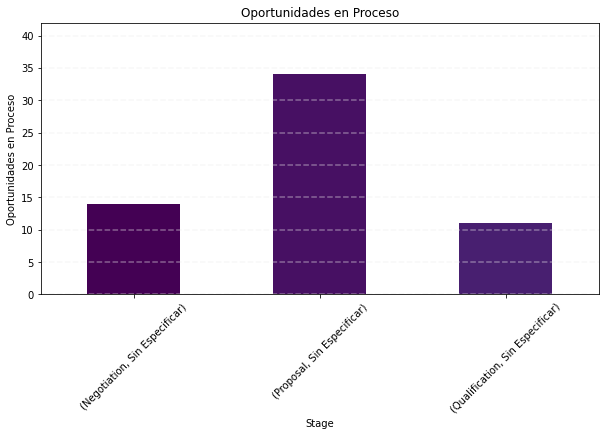

In [ ]:
graf4 = marcas_en_proceso['Oportunidades en Proceso'].plot(kind='bar', figsize=(10,5), rot=45, title='Oportunidades en Proceso', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportunidades en Proceso')
ax.set_xlabel('Stage')
lineas = graf4.get_yticks()
for i in lineas:
      graf4.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')


Grafico de marcas en proceso

In [ ]:
incidencia_marcas_region = entrenamiento.groupby(['Region','Brand']).agg({'ID':'count'})
incidencia_marcas_region = incidencia_marcas_region.rename(columns = {'ID': 'Oportunidades'})
incidencia_marcas_region

Oportunidades
Region      Brand                         
APAC        Brand_10                     8
            Brand_11                    12
            Brand_12                     1
            Brand_16                     1
            Brand_19                     1
...                                    ...
Middle East Brand_11                     9
            Brand_5                      3
            Brand_9                      2
            Other                        2
            Sin Especificar            167

[61 rows x 1 columns]

incidencia de las marcas en las regiones

Text(0.5, 1.0, 'Incidencia de Marcas por Region')

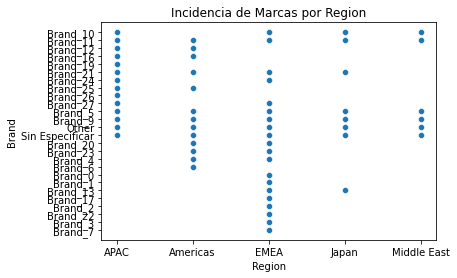

In [ ]:
grafico_marca_por_region = sns.scatterplot(x= 'Region', y = 'Brand' , data = incidencia_marcas_region)
grafico_marca_por_region.set_title('Incidencia de Marcas por Region')
